Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення
з різним контрастом. Без використання жодних бібліотек для обробки зображень
(наприклад Open CV), виконати відповідне завдання (номер завдання вказано у
рейтинговій таблиці)
1. Виконати 1D лінійну фільтрацію зображення з різними значеннми K i L. Провести порівняльний аналіз

In [1]:
%%capture
!wget -O image_1.jpg https://galka.if.ua/app/uploads/2020/12/disney-1-2.jpeg
!wget -O image_2.jpg https://img.championat.com/c/900x900/news/big/f/r/disney-priostanovila-rabotu-vseh-otraslej-svoego-biznesa-v-rossii_16469803531169916770.jpg
!wget -O image_3.jpg https://investory.news/wp-content/uploads/2019/04/Walt_Disney.jpg
!wget -O image_4.jpg https://i.pinimg.com/564x/0e/2f/2b/0e2f2be72d84064283c15bd2a4a06e94.jpg

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def read(img):
  arr = np.asarray(plt.imread(img), dtype=np.float32)
  if len(arr.shape) == 3 and arr.shape[2] == 3:
    arr = rgb2gray(arr)
  return arr

In [4]:
def filter(img, K, L):
    f_img = img * K + L
    f_img[f_img > 255] = 255
    f_img[f_img < 0] = 0
    return f_img

In [5]:
def plot_img(img_list):
  res = np.hstack(img_list)
  plt.imshow(res, cmap='gray')
  plt.axis('off')
  plt.show()

Original K=0.5, L=0 K=1, L=10 K=0.7, L=25


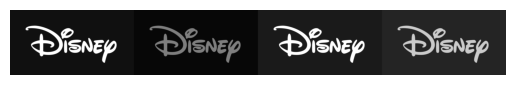

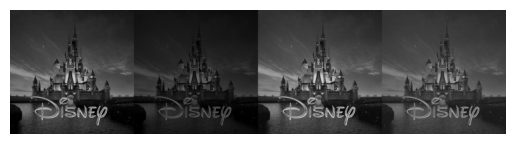

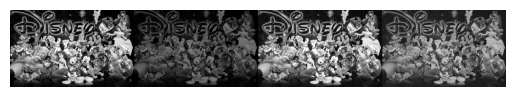

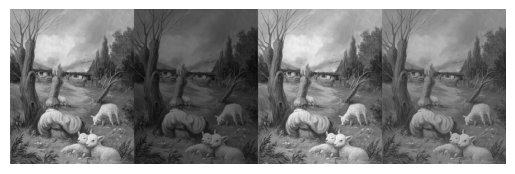

In [6]:
images = [read('image_1.jpg'), read('image_2.jpg'), read('image_3.jpg'), read('image_4.jpg')]

print(f'Original K={0.5}, L={0} K={1}, L={10} K={0.7}, L={25}')
for img in images:
  plot_img([img, filter(img, 0.5, 0), filter(img, 1, 10), filter(img, 0.7, 25)]) 